This project is called mental awareness and it will predict people who need treatment based on their mental health status. This project is based on machine learning in a jupyter notebook. In order to start this project, I would need a training data set which is the actual data set used to train a model for performing various actions which will be explained. I got the training data set from kaggle.


In the first cell of the notebook, we need to import things that we will need in order for the model to perform actions based on the training data set. To gain access to the training data set, we would need to import pandas because it’s a package in python that provides statistics methods, enables plotting and more. Pandas also has a feature that has the ability to write or read excel, csv, and other types of files and our dataset is a csv file type. We need to use the read_csv() method to work with the files effectively and set it equal to a dataframe which is a two-dimensional data structure in a form of rows and columns. We can store any number of datasets in a dataframe.


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, StandardScaler
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
mental_df = pd.read_csv('survey.csv')

In the second cell, we need to display the information and the size of the dataframe. We would need to use the describe() method, the shape() method and the info() method. The describe() method is used to calculate statistical data like mean, percentile and standard deviation of the numerical values in the dataframe. The shape() method will display the number of rows and columns. The info() method is used to get a concise summary of the dataframe which will print the columns and their data types. It will also display the number of non-null values in each column which is the number in front of the word non-null. 


In [19]:
#Learning about the data, and which columns have null values.
print(mental_df.shape, mental_df.describe(), mental_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In the third cell, we have to make sure that there aren't any outliers when graphing the information of people based on age. We would need to cut the age by a limit that was reasonable and that it displays information. For the output, two arrays will appear which represent the value of the histogram bins which bin is the number of intervals you want in your data. Also a histogram will display showing the data on how many people are that age. 

In [20]:
mental_df = mental_df[(mental_df["Age"] < 80) & (mental_df["Age"] > 0)]

In the fourth cell, we need to make sure that the ages is displayed in ranges or bins to make sure that data is displayed in a clean way. Each bar in the histogram would represent the ranges of age displayed from labels.

In [21]:
mental_df['age_range'] = pd.cut(mental_df['Age'], [0,20,40,60,80], labels=["0-20", "21-40", "41-60", "61-80"],  include_lowest=True)

In the fifth cell, we need to get rid of columns or features that don't provide information or have more null values than any other column based on the information in cell 2.

In [22]:
mental_df = mental_df.drop(['comments', 'state', 'self_employed', 'Timestamp', 'Country'], axis=1)

In the sixth cell, we want to figure out the unique elements in the array work_interference by using the unique() method. The method can also output the indices of the input array that give the unique values, the indices of the unique array that reconstruct the input array, the number of times each unique value comes up in the input array and the number of times each unique value comes up in the input array


In [23]:
mental_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In the seventh cell, we have to replace the NaN or missing values with something else by using the fillna() method which fills the NaN values with a given number with which you want to substitute. The inplace states that if true, then fill it in place.

In [24]:
mental_df["work_interfere"].fillna('NaN', inplace=True)
mental_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'NaN'], dtype=object)

In the eight cell, we are going to display the array that shows the possible inputs for Gender.

In [25]:
mental_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In the ninth cell, we are going to fix Gender by allowing different responses to be used for input when people are entering their gender. That information will be displayed in lists call male_Gender, female_Gender and trans_Gender. If the value in the column, Gender, matches the item in the list (like 'm' is in the list, male_Gender), then it is replaced with the value, 'male', or whatever it belongs to. If the value isn't in the lists then we made a purge list, so it would add that value to the purge list, then delete that row

In [26]:
male_Gender = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_Gender = ["trans","trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_Gender = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

purge_list = []
for f in range(mental_df.shape[0]):
    if mental_df.Gender.iloc[f].lower() in male_Gender:
        mental_df['Gender'].replace(mental_df.Gender.iloc[f], value ="male", inplace=True)
    elif mental_df.Gender.iloc[f].lower() in trans_Gender:
        mental_df['Gender'].replace(mental_df.Gender.iloc[f], value ="trans", inplace=True)
    elif mental_df.Gender.iloc[f].lower() in female_Gender:
        mental_df['Gender'].replace(mental_df.Gender.iloc[f], value ="female", inplace=True)
    else:
        purge_list.append(mental_df.Gender.iloc[f])
        print("ERROR", mental_df.Gender.iloc[f])
        print(purge_list)
   
for a in purge_list:
    mental_df = mental_df.drop(mental_df[mental_df.Gender==a].index, axis=0)
print(mental_df['Gender'].unique())


ERROR A little about you
['A little about you']
['female' 'male' 'trans']


In the tenth cell, we will need to label encode which means that we will need to convert the labels into numeric form so as to convert it into the machine-readable form. For the for statement, each item in the columns of the dataframe, it would have label_encoder equal to preprocessing which would encode target labels with values between 0 and n_classes-1. Label_encoder would fit meaning mostly matches the curvature of given data points and would transform it to bring the data together. Each of the items would be displayed in a dictionary with the column name and label_encoder as part of the dictionary however it would only print a few because of the head method.


In [27]:
#Encoding the data
label_Encoder_Dictionary = {}
for f in mental_df.columns:
    print(f)
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(mental_df[f])
    mental_df[f] = label_encoder.transform(mental_df[f])
    label_Encoder_Dictionary[f] = label_encoder

mental_df.head()
print(label_Encoder_Dictionary)

Age
Gender
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
age_range
{'Age': LabelEncoder(), 'Gender': LabelEncoder(), 'family_history': LabelEncoder(), 'treatment': LabelEncoder(), 'work_interfere': LabelEncoder(), 'no_employees': LabelEncoder(), 'remote_work': LabelEncoder(), 'tech_company': LabelEncoder(), 'benefits': LabelEncoder(), 'care_options': LabelEncoder(), 'wellness_program': LabelEncoder(), 'seek_help': LabelEncoder(), 'anonymity': LabelEncoder(), 'leave': LabelEncoder(), 'mental_health_consequence': LabelEncoder(), 'phys_health_consequence': LabelEncoder(), 'coworkers': LabelEncoder(), 'supervisor': LabelEncoder(), 'mental_health_interview': LabelEncoder(), 'phys_health_interview': LabelEncoder(), 'mental_vs_physical': LabelEncod

In the eleventh cell, we are using a correlation matrix which is the set of correlation values between pairs of its attributes form  and its used from statisticians and data analysts who measure correlation of two numerical variables to find an insight about their relationships. We would need to set up the size and use the corr() method which would be used to find the pairwise correlation of all columns in the dataframe. Any nan values are automatically excluded. The variable k represents the number of variables in the matrix and we need to to get the first n rows ordered by columns in descending order. We would also need to use the corrcoef function that returns a matrix of correlations of x with x, x with y, y with x and y with y. We would also need to set some parameters of the heatmap which demonstrates what things you need to display the matrix like cbar representing colorbar, annot which demonstrates the data value in each cell, square represents the square shape of the matrix, fmt which would represent the string formatting code, annot_kws represents the keyword arguments when annot is true and both xticklabels and yticklabels represents the names of columns.


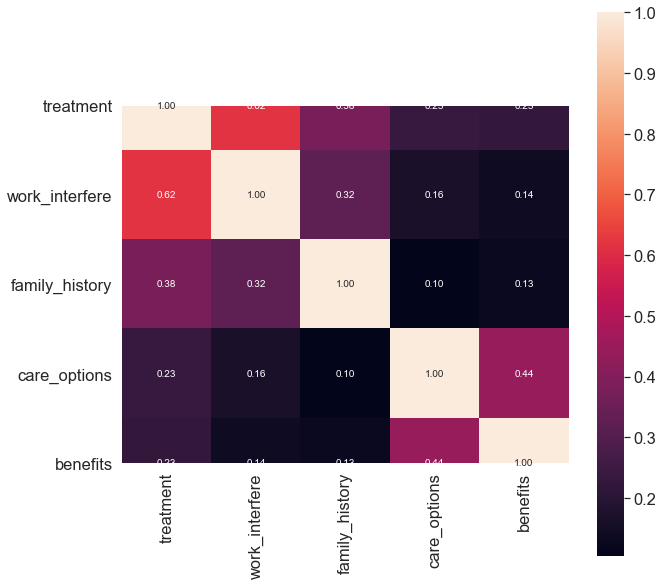

In [28]:
correlation_matrix = mental_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
k = 5 
columns = correlation_matrix.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(mental_df[columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In the twelfth cell, we scale the features which means that it helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm. We will need to scale the top 7 strongly correlated features by getting them, and setting x into the columns or the features and setting y to the target which the target is  treatment. We would need to drop treatment from the columns and use StandardScaler which transforms the data in such a manner that it has mean as 0 and standard deviation as 1. For each item in the x, we would have to scale it, use fir_transform meaning to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). 


In [29]:
top_k_columns = np.array(correlation_matrix.nlargest(k, "treatment")["treatment"].index)
X = mental_df[top_k_columns]
Y = X.treatment 
X=X.drop("treatment", axis=1) 

feature_cols = np.delete(top_k_columns, np.where(top_k_columns == "treatment"))
for f in feature_cols:
    scaler = StandardScaler()
    X[f] = scaler.fit_transform(X[[f]])

In the thirteen cell, we would have to set up an x_trains, y_trains, x_test, and y_test from the train_test_split function. The train_test_split function is used for splitting data arrays into two subsets: for training data and for testing data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model's prediction on this subset. The x and y has their own training set and test set. By specifying the train_size as 0.7, we aim to put 70% of the data into our training set, and the rest of the data into the test set. The random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case. ... If random_state is None or np. random, then a randomly-initialized RandomState object is returned. 


In [30]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.70, random_state=20)

In the fourteenth cell, we will be creating a confusion matrix which is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. We created a function call evaluate which would have parameters call y_test and y_pred_class. We would have to set a variable call confusion to make sure the metrics is in the confusion_matrix function which will calculate a confusion matrix and return the result as an array. Same as correlation matrix, you need to use sns.heatmap and set up the size of the matrix. We would also have to display the accuracy and the auc_score which takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.


In [31]:
def evaluate(y_test, y_pred):
    confusion = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc_score = metrics.roc_auc_score(y_test, y_pred)
    print("Accuracy: {}\nAUC_Score: {}".format(accuracy, auc_score))
    

In the fifteenth cell, we use logistic regression model and logistic regression mean is a supervised learning classification algorithm used to predict the probability of a target variable. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function.The function LogisticRegression() will do that. We will create an instance of the classifier and fit it to the training data like logreg. We’ll now create the predictions by running the classifier on the test dataset.


In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In the last cell, we call the function evaluate and it will display a confusion matrix. In the confusion matrix the top left square represents true negative meaning the amount of predictions made that are false were actually false. In the bottom left square, it represents false negative meaning the amount of predictions that were predicted false were actually true. In the bottom right square, it represents the true positive meaning that the number of predictions that were made to be true were actually true and the top right square represents false positive meaning that all the predictions that were made to be true were actually false. Check the accuracy however the accuracy is decent however it would need more features like if the person had psychotherapy or is taking medications. The more information, the more accurate it can get.

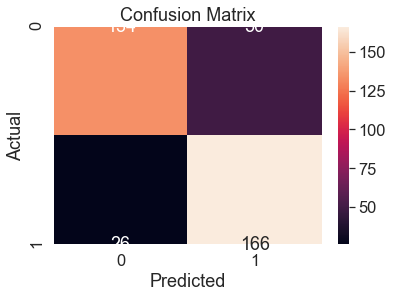

Accuracy: 0.7978723404255319
AUC_Score: 0.7964221014492754


In [33]:
evaluate(y_test, y_pred)